In [1]:
#Importando a biblioteca
import pandas as pd

In [4]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
#Exibindo as primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
#Exibindo as últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Amostra de 5 linhas aleatórias
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
85,Salvador,2019-01-01,16.88,1035,3
139,Recife,2019-03-02,141.16,980,7
19,Recife,2019-01-01,199.43,983,7
45,Aracaju,2018-01-01,131.12,1523,5
124,Recife,2019-03-02,47.98,983,7


In [9]:
#Verificando tipo de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID']=df['LojaID'].astype('object')

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
#Substituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [18]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
171,Salvador,2019-01-02,136.45,1035,3
60,Salvador,2019-01-01,96.01,1034,2
14,Fortaleza,2019-01-12,132.68,1005,1
53,Recife,2019-01-01,37.05,983,6
35,Recife,2019-01-01,148.90,983,1
233,Natal,2019-01-03,172.40,1036,2
120,Recife,2019-03-02,184.90,982,4
51,Recife,2019-01-01,146.95,982,2
215,Natal,2019-01-02,203.84,1036,1
109,Fortaleza,2019-03-02,18.90,982,6


In [20]:
#Apagando as linhas com valores nulos em todas as colunas
df.dropna(how='all', inplace=True)

In [21]:
#Criando a coluna de receitas (multiplicando a coluna receitas por vendas)
df['Receitas']=df['Vendas'].mul(df['Qtde'])

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [28]:
#Retornando maior receita
df['Receitas'].max()

3544.0

In [30]:
#Retornando menor receita
df['Receitas'].min()

3.34

In [31]:
#3 linhas com maiores receitas
df.nlargest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [33]:
#3 linhas com menores receitas
df.nsmallest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [36]:
#Agrupamento por cidade
df.groupby('Cidade')['Receitas'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [54]:
#Ordenando o conjunto de dados
df.sort_values('Receitas', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Abno_Venda,Ano_Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,2019,2019
55,Natal,2019-01-08,859.0,854,4,3436.0,2019,2019
51,Natal,2018-01-21,859.0,852,4,3436.0,2018,2018
30,Natal,2018-10-02,856.0,853,4,3424.0,2018,2018
41,Natal,2018-05-20,835.0,852,4,3340.0,2018,2018
38,Natal,2018-02-25,828.0,852,4,3312.0,2018,2018
10,Natal,2018-10-27,828.0,852,4,3312.0,2018,2018
69,Natal,2019-03-24,817.0,852,4,3268.0,2019,2019
62,Natal,2018-02-10,793.0,854,4,3172.0,2018,2018
52,Natal,2018-04-27,778.0,854,4,3112.0,2018,2018


## Trabalhando com datas

In [45]:
df['Data']=pd.to_datetime(df['Data'])

In [48]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [51]:
#Agrupando por ano 
df.groupby(df['Data'].dt.year)['Receitas'].sum()


,Cidade,Data,Vendas,LojaID,Qtde,Receitas
1,Salvador,2018-01-01,19.02,1034,3,57.06
41,Fortaleza,2019-02-13,191.29,1002,3,573.87
140,Fortaleza,2019-03-02,166.89,983,5,834.45
28,Recife,2019-01-01,123.69,983,3,371.07
23,Salvador,2019-01-01,193.20,1036,3,579.60


In [57]:
#Criando uma nova coluna com o ano
df['Ano_Venda']=df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019
97,Fortaleza,2019-01-01,139.70,1003,4,558.80,2019
41,Salvador,2019-02-13,9.86,1035,2,19.72,2019
6,Recife,2019-01-01,16.27,981,6,97.62,2019
93,Natal,2019-01-02,15.58,1037,1,15.58,2019


In [60]:
#Extraindo o mês e o dia 
df['mes_venda'], df['dia_venda']=(df['Data'].dt.month, df['Data'].dt.day)
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,mes_venda,dia_venda
42,Salvador,2019-01-01,44.28,1034,1,44.28,2019,1,1
163,Salvador,2019-01-02,17.66,1036,3,52.98,2019,1,2
87,Aracaju,2018-01-01,116.71,1520,4,466.84,2018,1,1
57,Aracaju,2018-01-01,23.49,1520,7,164.43,2018,1,1
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2


In [64]:
#Calculando a diferenã de dias 
df['diferenca_dias']=df['Data']-df["Data"].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
26,Aracaju,2018-01-01,6.98,1521,10,69.80,2018,1,1,0 days
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days
27,Salvador,2019-01-01,145.79,1034,1,145.79,2019,1,1,365 days
78,Aracaju,2018-01-01,154.85,1522,9,1393.65,2018,1,1,0 days
112,Recife,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days


In [67]:
#Criando a coluna de trimestre 
df['trimestre_venda']=df['Data'].dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
69,Natal,2019-03-24,817.00,852,4,3268.00,2019,3,24,447 days,1
83,Fortaleza,2019-01-01,3.88,1002,6,23.28,2019,1,1,365 days,1
20,Natal,2018-06-08,608.00,852,4,2432.00,2018,6,8,158 days,2
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1,365 days,1
228,Natal,2019-01-02,6.87,1037,3,20.61,2019,1,2,366 days,1


In [70]:
#Filtrando as vendas de 2019 do mês de março 
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019)&(df['Data'].dt.month==3)]
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days,1
138,Recife,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
123,Salvador,2019-03-02,127.45,1036,3,382.35,2019,3,2,425 days,1
128,Salvador,2019-03-02,36.84,1034,1,36.84,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,2019,3,2,425 days,1


##  Visualização de dados

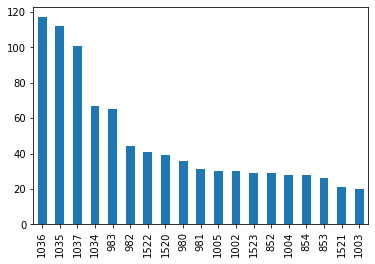

In [77]:
#Criando gráfico de barras de vendas por loja
df['LojaID'].value_counts(ascending=False).plot.bar();

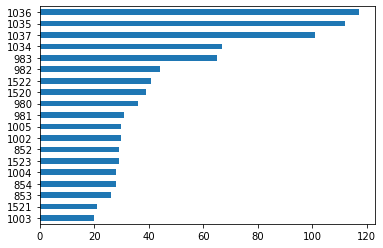

In [76]:
#Criando gráfico de barras horizontais de vendas por loja
df['LojaID'].value_counts(ascending=True).plot.barh();

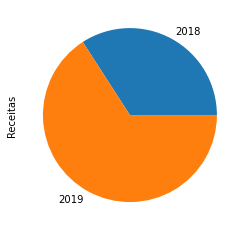

In [81]:
#Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receitas'].sum().plot.pie();

In [83]:
#Total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

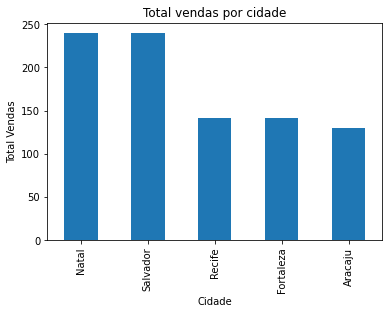

In [85]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

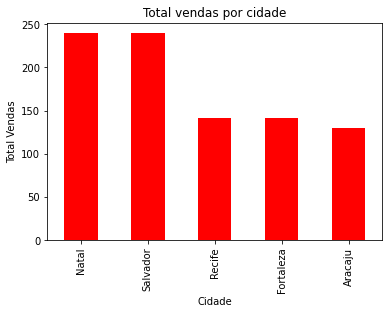

In [87]:
#Alterando a cor
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

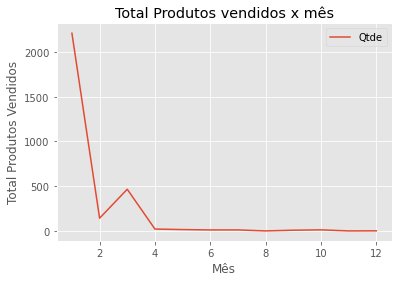

In [94]:
#Alterando o estilo 
plt.style.use('ggplot')
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title = 'Total Produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [95]:
df.groupby(df['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [98]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

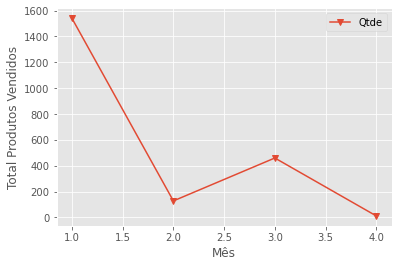

In [101]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

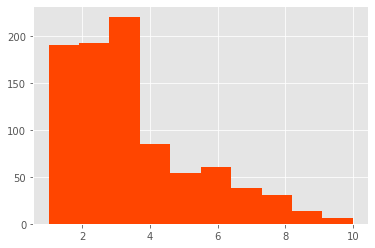

In [104]:
#Histograma
plt.hist(df['Qtde'], color='orangered');

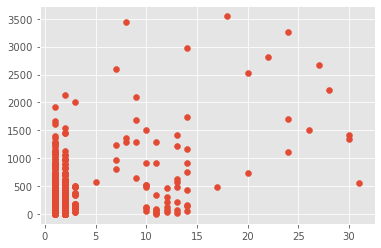

In [106]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receitas']);

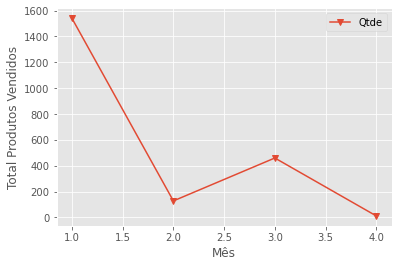

In [107]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend()
plt.savefig('grafico QTDE x MES.png')